**Домашнее задание №1**

Ваша задача: предсказать клиентов, которые намереваются уйти (churn).

Необходимо продемонстрировать этапы подготовки данных:
- Загрузка
- Корректность загрузки
- Проверка на дубликаты
- Проверка на пропуски
- Проверка на аномалии

Группировки данных по категориям в зависимости от целевой переменной (выводы о данных, например, отток по типу карты)

Визуализации: гистограммы, тепловые карты, pairplot-ы, violin

Кодирование данных (через one-hot и через уникальное значение)

Разеделение на train и test

Обучение и перебор любых гиперпараметров пройденных алгоритмов на train части

Оценка алгоритма по test части

Данные: churn.csv

In [22]:
# Импорты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

# Подготовка Данных

In [23]:
# Загрука данных
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/churn.csv")
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [24]:
# Корректность загрузки
print(f"Размер данных: {df.shape}")
df.head()

Размер данных: (10127, 20)


,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [25]:
# Проверка на дубликаты
duplicateds = df.duplicated().sum()
print("Количество дублируймых строк:", duplicateds)

Количество дублируймых строк: 0


In [26]:
# Проверка на пропуски
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [27]:
# Крутые данные, зачем не понял
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [28]:
# Проверка на аномалии
anomalis = 0
anomalis += len(df[df["Customer_Age"] > 90]) # Люди которым больше 90 лет не подходят
anomalis += len(df[df["Customer_Age"] < 18]) # Люди которым меньше 18 лет не подходят
anomalis += len(df[df["Months_Inactive_12_mon"] > 12]) # Больше 12 месяцев не может быть
anomalis += len(df[df["Contacts_Count_12_mon"] > 12]) # Больше 12 месяцев не может быть
print(f"Количетсво Аномалий: {anomalis}")

Количетсво Аномалий: 0


# Анализ Целевой переменной

In [29]:
print("Распределение целевой переменной:")
analyst = df['churn'].value_counts()
# print(analyst)
print(f"Процент оттока: {analyst['Attrited Customer'] / analyst.sum():.2%}")

Распределение целевой переменной:
Процент оттока: 16.07%


In [30]:
# Анализ оттока по различным категориям
categories = ['Card_Category', 'Income_Category', 'Education_Level', 'Marital_Status']

for category in categories:
    churn_by_category = df.groupby(category)['churn'].value_counts(normalize=True).unstack()
    print(churn_by_category)

churn          Attrited Customer  Existing Customer
Card_Category                                      
Blue                    0.160979           0.839021
Gold                    0.181034           0.818966
Platinum                0.250000           0.750000
Silver                  0.147748           0.852252
churn            Attrited Customer  Existing Customer
Income_Category                                      
$120K +                   0.173315           0.826685
$40K - $60K               0.151397           0.848603
$60K - $80K               0.134807           0.865193
$80K - $120K              0.157655           0.842345
Less than $40K            0.171862           0.828138
Unknown                   0.168165           0.831835
churn            Attrited Customer  Existing Customer
Education_Level                                      
College                   0.152024           0.847976
Doctorate                 0.210643           0.789357
Graduate                  0.155691      

# Визуализации

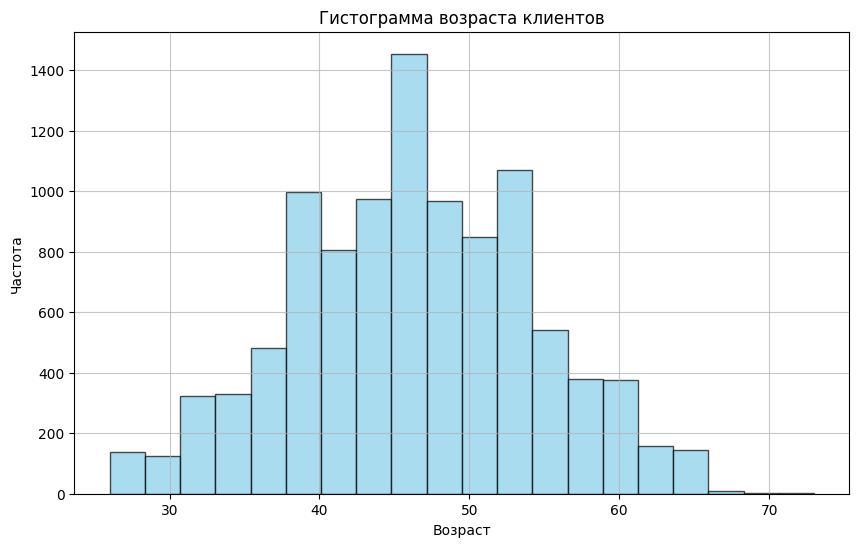

In [31]:
# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Age'],
         bins=20,
         alpha=0.7,
         color='skyblue',
         edgecolor='black')
plt.title('Гистограмма возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True, alpha=0.7)
plt.show()

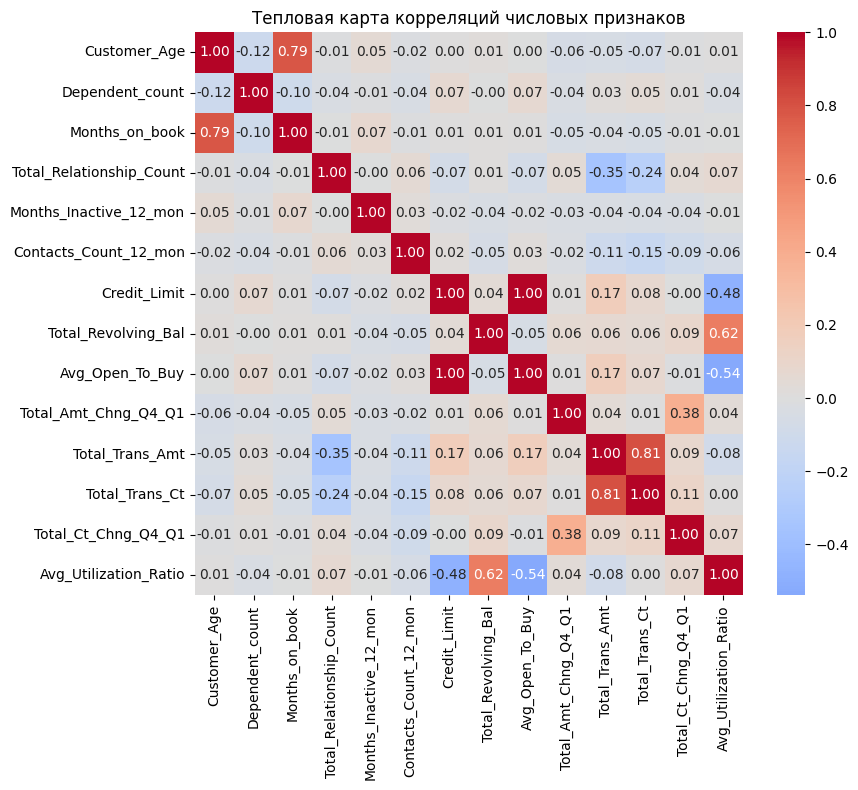

In [32]:
# Тепловая карта
plt.figure(figsize=(9, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0)
plt.title('Тепловая карта корреляций числовых признаков')
plt.tight_layout()
plt.show()

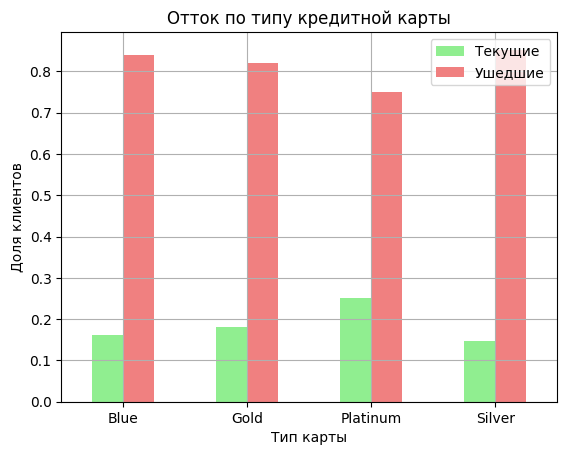

In [33]:
# Отток по типу кредитной карты
card_churn = df.groupby('Card_Category')['churn'].value_counts(normalize=True).unstack()
card_churn.plot(kind='bar',
                color=['lightgreen', 'lightcoral'])
plt.title('Отток по типу кредитной карты')
plt.xlabel('Тип карты')
plt.ylabel('Доля клиентов')
plt.legend(['Текущие', 'Ушедшие'])
plt.xticks(rotation=0)
plt.grid(True, alpha=1)
plt.show()

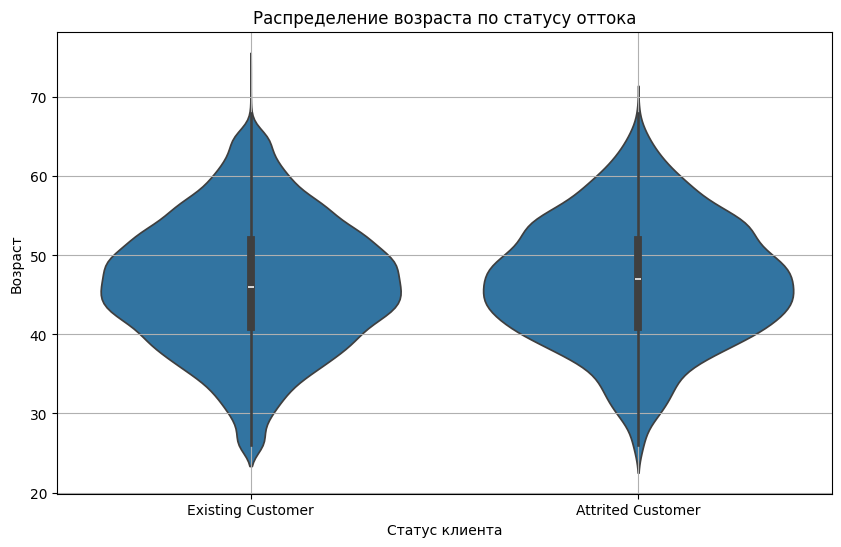

In [34]:
# Violin
plt.figure(figsize=(10, 6))
sns.violinplot(data=df,
               x='churn',
               y='Customer_Age')
plt.title('Распределение возраста по статусу оттока')
plt.xlabel('Статус клиента')
plt.ylabel('Возраст')
plt.grid(True)
plt.show()

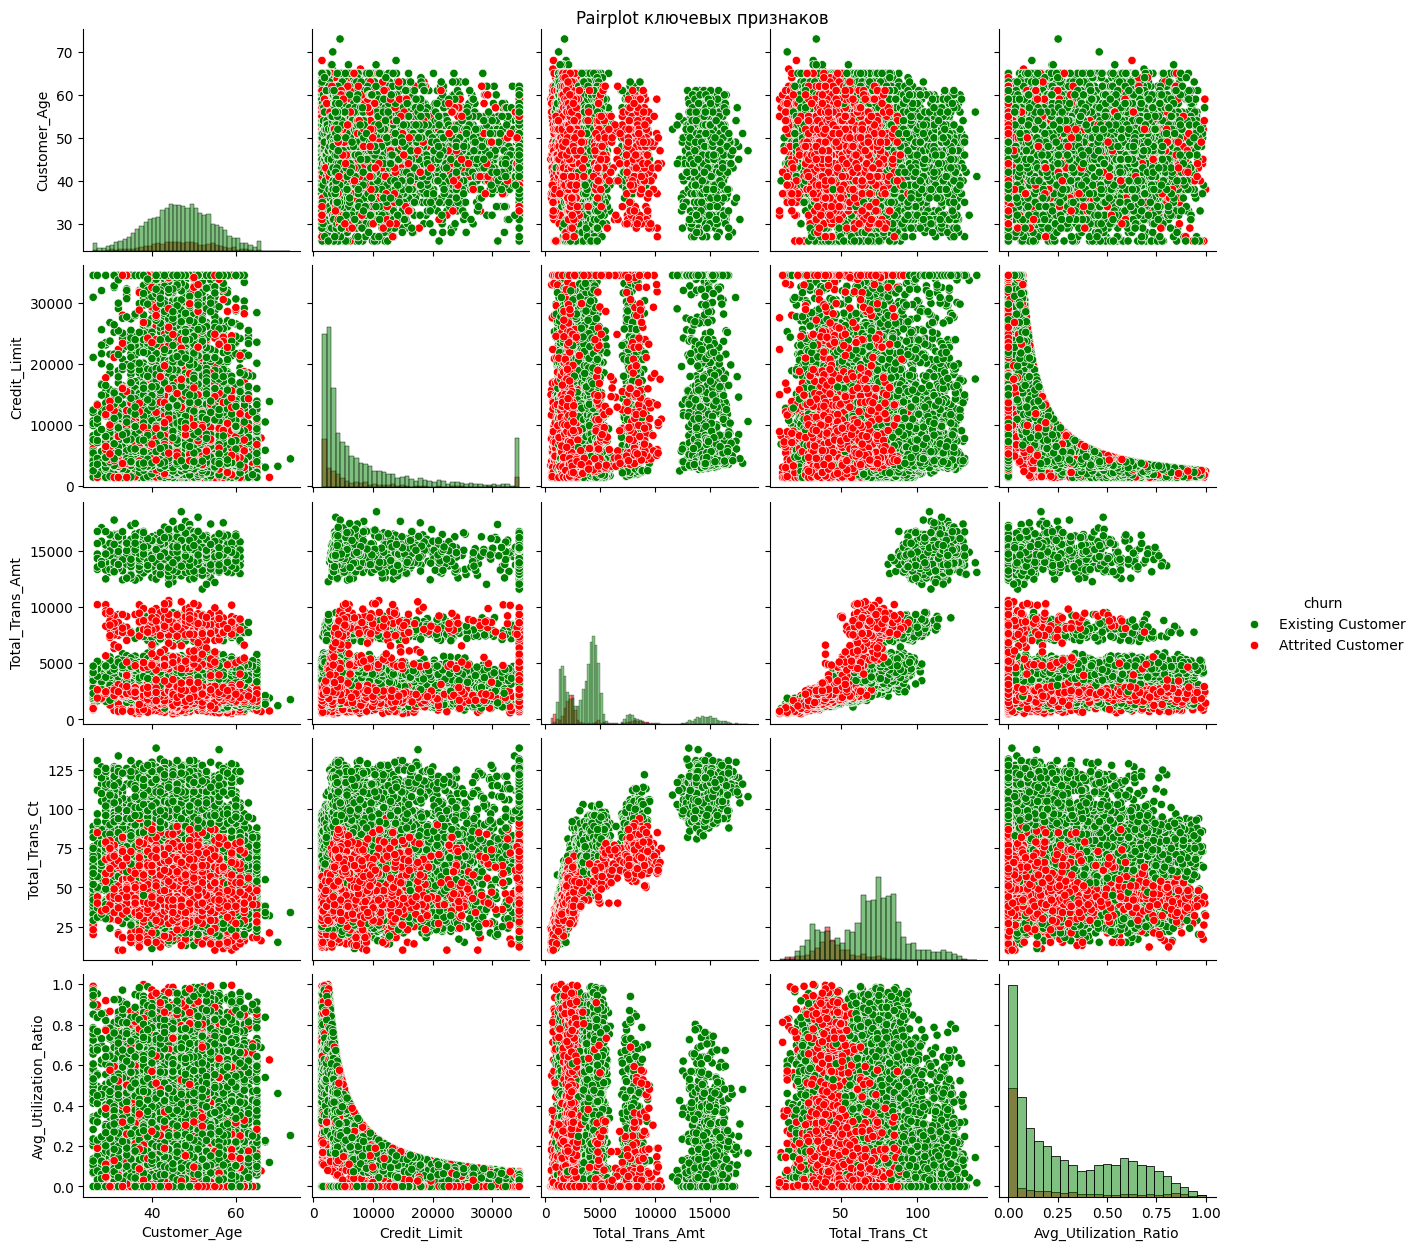

In [35]:
# Pairplot для ключевых признаков
key_columns = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'churn']
sns.pairplot(df[key_columns],
             hue='churn',
             diag_kind='hist',
             palette={'Existing Customer': 'green', 'Attrited Customer': 'red'})
plt.suptitle('Pairplot ключевых признаков', y=1)
plt.show()

# Кодирование данных

In [36]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
X = pd.get_dummies(df.drop('churn', axis=1), columns=categorical_cols, drop_first=True)
Y = df['churn']

print(f"X shape: {X.shape}, Y shape: {Y.shape}")
print(f"Y unique: {np.unique(Y)}, NaN в Y: {Y.isnull().sum()}")

X shape: (10127, 32), Y shape: (10127,)
Y unique: ['Attrited Customer' 'Existing Customer'], NaN в Y: 0


In [37]:
# Разделение на train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
print(f" Разделение: train={X_train.shape}, test={X_test.shape}")

 Разделение: train=(8101, 32), test=(2026, 32)


# Обучение и перебор любых гиперпараметров пройденных алгоритмов на train части

In [38]:
# Рандомный Лес - RF
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, Y_train)
print(f"RF лучшие параметры: {rf_grid.best_params_}")
print(f"RF CV F1: {rf_grid.best_score_:.3f}")

RF лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
RF CV F1: nan


In [39]:
# логистическая регрессия - LR
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, cv=3, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, Y_train)
print(f"LR лучшие параметры: {lr_grid.best_params_}")
print(f"LR CV F1: {lr_grid.best_score_:.3f}")

LR лучшие параметры: {'C': 0.1}
LR CV F1: nan


# Оценка алгоритма по test части

In [43]:
# Предсказания на тестовых данных
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_pred_lr = lr_grid.best_estimator_.predict(X_test)

# Оценка качества модели
print("\nRandom Forest:")
print(classification_report(Y_test, y_pred_rf, target_names=['Existing', 'Attrited']))

print("\nLogistic Regression:")
print(classification_report(Y_test, y_pred_lr, target_names=['Existing', 'Attrited']))

# Анализ важности признаков
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)



Random Forest:
              precision    recall  f1-score   support

    Existing       0.85      0.87      0.86       325
    Attrited       0.97      0.97      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.91      0.92      0.92      2026
weighted avg       0.95      0.95      0.95      2026


Logistic Regression:
              precision    recall  f1-score   support

    Existing       0.46      0.80      0.58       325
    Attrited       0.96      0.82      0.88      1701

    accuracy                           0.81      2026
   macro avg       0.71      0.81      0.73      2026
weighted avg       0.88      0.81      0.83      2026

